__Problem Statement:__

Create a Regression model to find the demand for shared bikes

# Step 1: Data preparation

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data

bike_data = pd.read_csv(r'D:\Multiple Linear Regression Assignment\day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data_copy = bike_data.copy()

In [4]:
# Extracting the day number from given date

bike_data['Day'] = pd.DatetimeIndex(bike_data['dteday'], dayfirst=True).day

In [5]:
# Dataframe shape

bike_data.shape

(730, 17)

In [6]:
# The numeric values for weathersit & season gives the impresion that they are ordinal categorical variables
# Change the numeric values of weathersit & season to corresponding string values

bike_data['weathersit'] = bike_data['weathersit'].replace(to_replace=[1, 2, 3, 4], 
                                                          value=['Clear', 'Mist', 'LightSnow', 'HeavyRain'])

bike_data['season'] = bike_data['season'].replace(to_replace=[1, 2, 3, 4], 
                                                          value=['Spring', 'Summer', 'Fall', 'Winter'])

In [7]:
# Change the datatype of weathersit & season to Categorical

bike_data['weathersit'] = bike_data['weathersit'].astype('category')
bike_data['season'] = bike_data['season'].astype('category')

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day
0,1,01-01-2018,Spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,02-01-2018,Spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [8]:
bike_data.shape

(730, 17)

In [9]:
# Converting the Day column from numeric to categorical by grouping

bike_data['Week_Number'] = (bike_data['Day'] - 1) // 7 + 1
bike_data['Week_Number'] = bike_data['Week_Number'].astype('category')

In [10]:
bike_data.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day,Week_Number
0,1,01-01-2018,Spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1
1,2,02-01-2018,Spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,1
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,1
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,1
5,6,06-01-2018,Spring,0,1,0,4,1,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606,6,1
6,7,07-01-2018,Spring,0,1,0,5,1,Mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510,7,1
7,8,08-01-2018,Spring,0,1,0,6,0,Mist,6.765000,8.11270,53.5833,17.875868,68,891,959,8,2
8,9,09-01-2018,Spring,0,1,0,0,0,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822,9,2
9,10,10-01-2018,Spring,0,1,0,1,1,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321,10,2


In [11]:
# Dropping the Day column

bike_data.drop('Day', axis=1, inplace=True)

In [12]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   instant      730 non-null    int64   
 1   dteday       730 non-null    object  
 2   season       730 non-null    category
 3   yr           730 non-null    int64   
 4   mnth         730 non-null    int64   
 5   holiday      730 non-null    int64   
 6   weekday      730 non-null    int64   
 7   workingday   730 non-null    int64   
 8   weathersit   730 non-null    category
 9   temp         730 non-null    float64 
 10  atemp        730 non-null    float64 
 11  hum          730 non-null    float64 
 12  windspeed    730 non-null    float64 
 13  casual       730 non-null    int64   
 14  registered   730 non-null    int64   
 15  cnt          730 non-null    int64   
 16  Week_Number  730 non-null    category
dtypes: category(3), float64(4), int64(9), object(1)
memory usage: 82.6+ KB


In [13]:
# Check if there are any null values

bike_data.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
Week_Number    0
dtype: int64

In [14]:
# No null values are present

In [15]:
# instant is a sequence number and required data is extracted from dteday. So, they can be romoved

bike_data.drop(['instant', 'dteday'], inplace=True, axis=1, errors='ignore')

In [16]:
# As cnt is the sum of casual and registered users, we can remove casual and registered features
bike_data.drop(['casual', 'registered'], inplace=True, axis=1, errors='ignore')

In [17]:
# Converting numeric weekdays to string values

bike_data['weekday'] = bike_data['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [18]:
# Rename columns names to meaningful names
bike_data.rename(columns = 
                 {'yr':'Year', 'mnth':'Month', 'atemp':'TempFeel', 'weathersit':'WeatherSituation', 'hum':'Humidity'}, 
                 inplace=True)
bike_data.columns = [x[0].upper()+x[1:] for x in bike_data.columns.to_list()]

In [19]:
# Converting numeric months to string values

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bike_data['Month'] = bike_data['Month'].map({Months.index(x)+1:x for x in Months})

In [20]:
bike_data.head()

,Season,Year,Month,Holiday,Weekday,Workingday,WeatherSituation,Temp,TempFeel,Humidity,Windspeed,Cnt,Week_Number
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1


In [21]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Season            730 non-null    category
 1   Year              730 non-null    int64   
 2   Month             730 non-null    object  
 3   Holiday           730 non-null    int64   
 4   Weekday           730 non-null    object  
 5   Workingday        730 non-null    int64   
 6   WeatherSituation  730 non-null    category
 7   Temp              730 non-null    float64 
 8   TempFeel          730 non-null    float64 
 9   Humidity          730 non-null    float64 
 10  Windspeed         730 non-null    float64 
 11  Cnt               730 non-null    int64   
 12  Week_Number       730 non-null    category
dtypes: category(3), float64(4), int64(4), object(2)
memory usage: 59.8+ KB


In [22]:
bike_data.describe()

,Year,Holiday,Workingday,Temp,TempFeel,Humidity,Windspeed,Cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Step 2: Exploratory Data Analysis

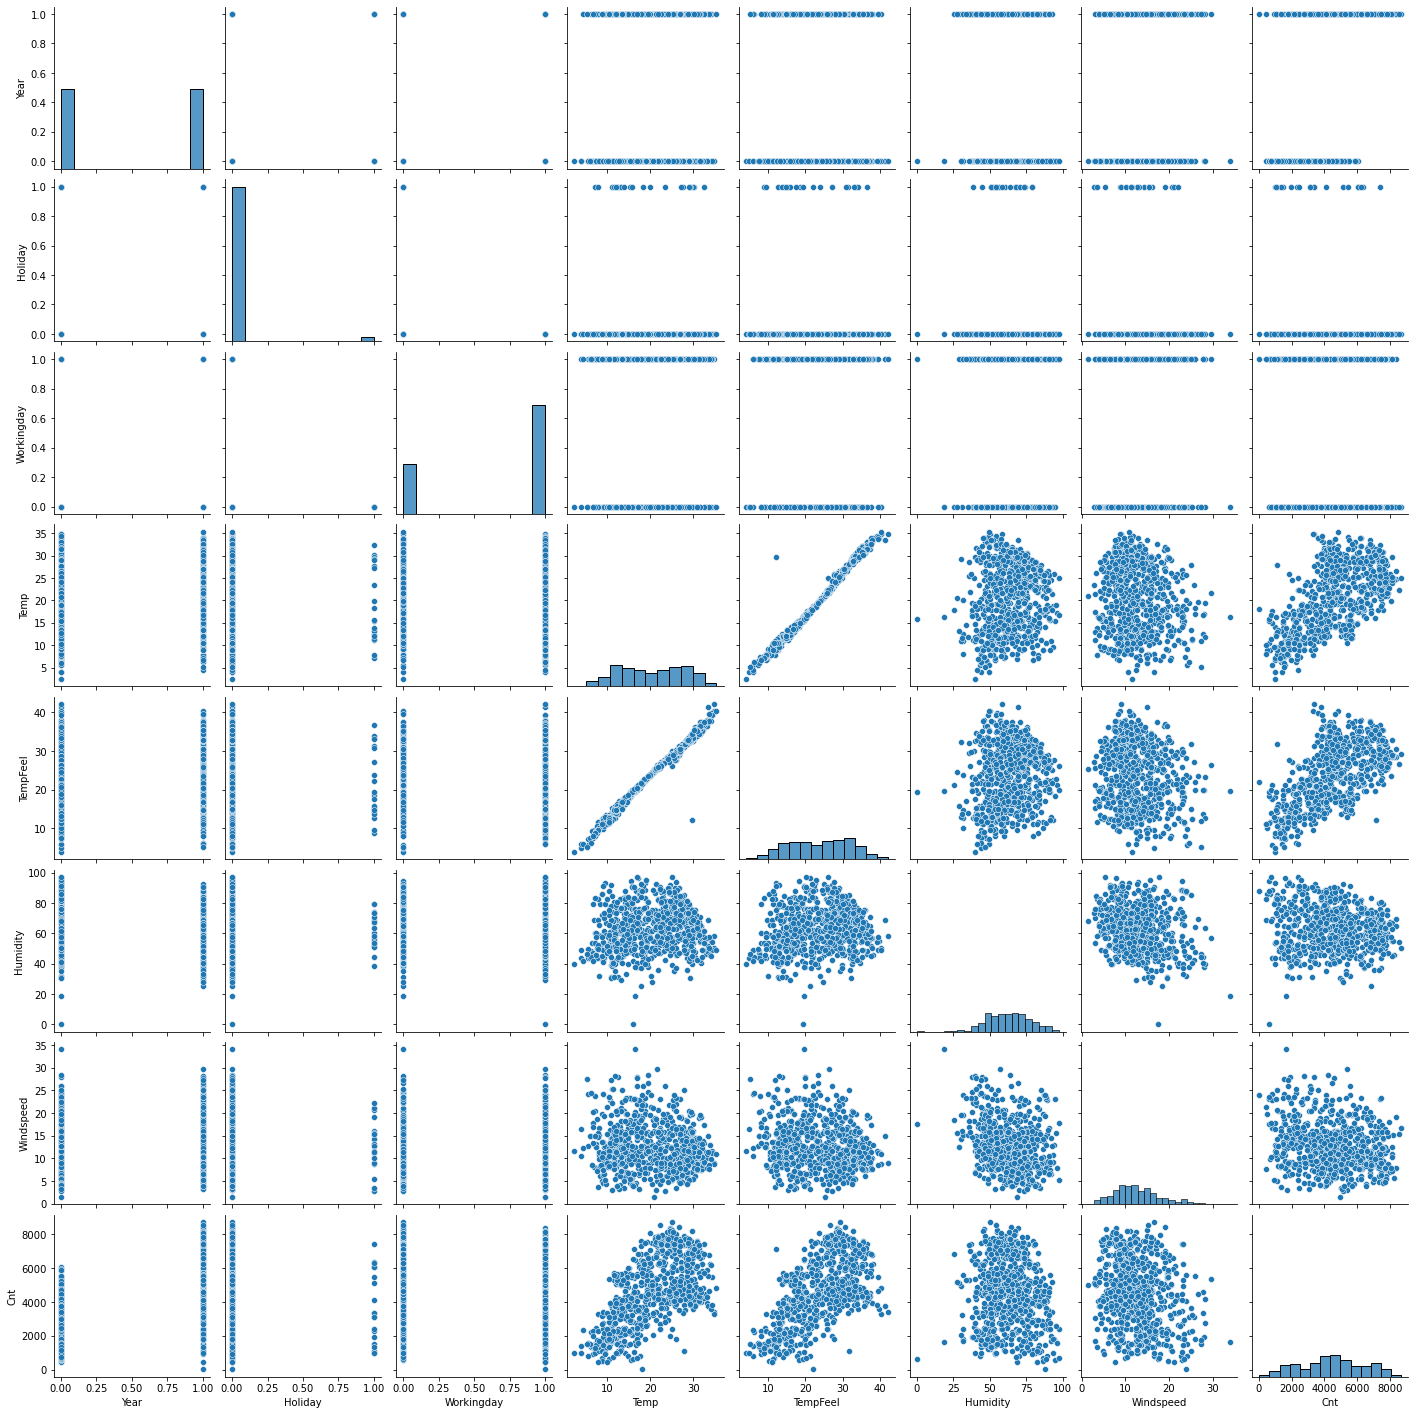

In [23]:
# Build a pair plot to understand the relation between variables

sns.pairplot(bike_data)

<AxesSubplot:>

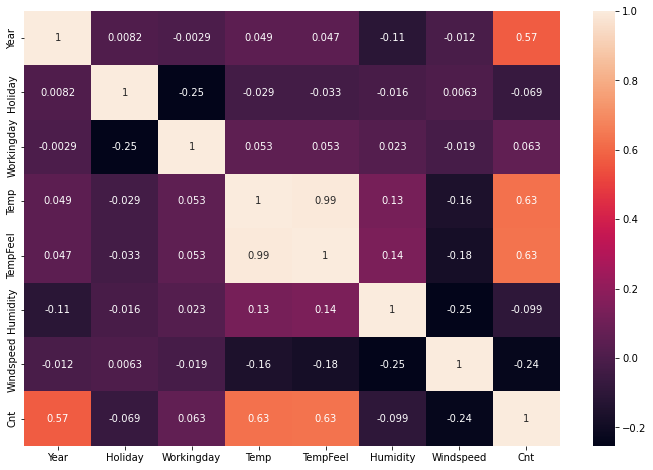

In [24]:
# Builsding Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(bike_data.corr(), annot=True)

#### Observations

-  Temp and TempFeel has a very good positive relationship with each other having 0.99 correlation
-  Temp and TempFeel has a very good positive relationship on dependent variable Cnt. When Temp or TempFeel increases, demand for shared bikes also increases
-  When wind speed is high, the demand for shared bikes decreases
-  Windspeed and Humidity has -ve correlation. When windspeed increases, humidity decreases

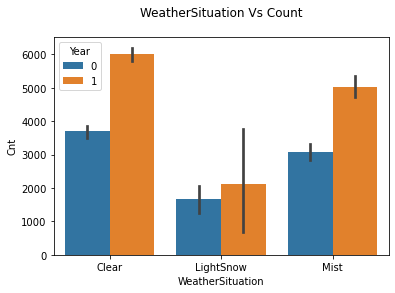

In [25]:
sns.barplot('WeatherSituation', 'Cnt', data=bike_data, hue='Year')
plt.title("WeatherSituation Vs Count\n")
plt.show()

__Observations:__

-  When the weather is clear, most customers go for rental
- But when it is lightsnow, it attracts low customers

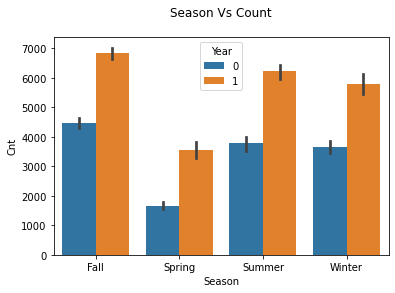

In [26]:
sns.barplot('Season', 'Cnt', data=bike_data, hue='Year')
plt.title("Season Vs Count\n")
plt.show()

Observations:

-  Above graph shows that the demand for shared bikes has ncreased from 2018 to 2019
-  Also, Spring season has lowest demand while Fall season has high demand

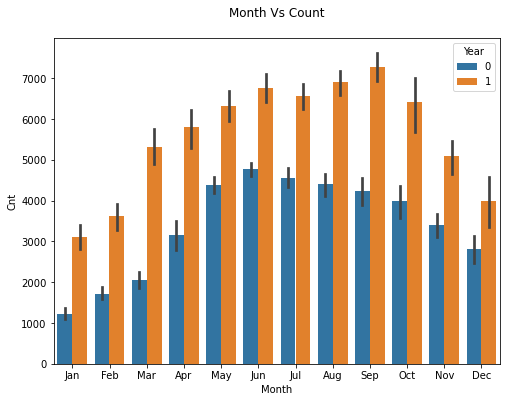

In [27]:
plt.figure(figsize=(8,6))

sns.barplot('Month', 'Cnt', data=bike_data, hue='Year')
plt.title("Month Vs Count\n")
plt.show()

Observations:
-  The rentals are increasing from Jan to Sept with a minor dip in Jul. And again started decreasing.

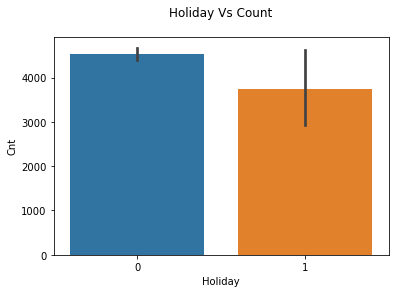

In [28]:
plt.figure(figsize=(6,4))

sns.barplot('Holiday', 'Cnt', data=bike_data)
plt.title('Holiday Vs Count\n')
plt.show()

Observations:
-  During holidays, the bike rentals are low. This may be due to people prefer to stay at home during holiday 

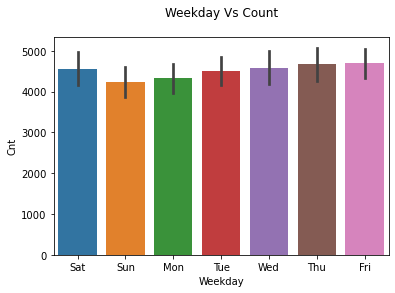

In [29]:
sns.barplot('Weekday', 'Cnt', data=bike_data)
plt.title('Weekday Vs Count\n')
plt.show()

Observations:
-  Almost all days has similar demand. But Sundays and Mondays have some dip

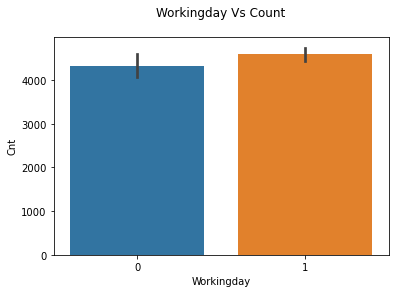

In [30]:
sns.barplot('Workingday', 'Cnt', data=bike_data)
plt.title('Workingday Vs Count\n')
plt.show()

Observations:
-  All together whether its working day or non working day, the demand is almost same, though there is sligh high on working day

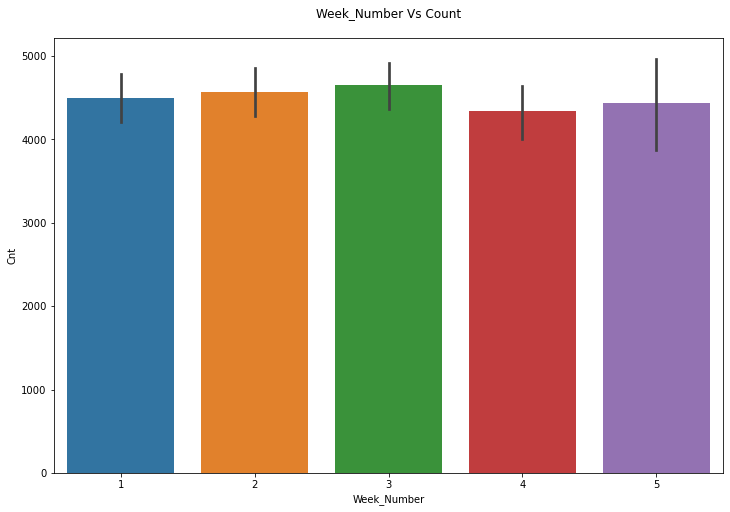

In [31]:
plt.figure(figsize=(12,8))
sns.barplot('Week_Number', 'Cnt', data=bike_data)
plt.title('Week_Number Vs Count\n')
plt.show()

__Observations:__

-  The average bike rentals in first 3 weeks is almost same
-  However 4th and 5th week, there is a minor dip

# Step 3: Data Preprocessing

#### Categorical encoding & Scaling of variables

In [32]:
# Preparing list of variables that need to be encoded
varlist = ['Season', 'Month', 'Weekday', 'WeatherSituation', 'Week_Number']

In [33]:
# Encoding using dummies
df_varlist = pd.get_dummies(bike_data[varlist], drop_first=True)

In [34]:
# Concatenate the original dataframe and encoded dataframe
bike_data = pd.concat([bike_data, df_varlist], axis=1)

In [35]:
bike_data.head()

,Season,Year,Month,Holiday,Weekday,Workingday,WeatherSituation,Temp,TempFeel,Humidity,...,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,WeatherSituation_LightSnow,WeatherSituation_Mist,Week_Number_2,Week_Number_3,Week_Number_4,Week_Number_5
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,1,0,0,0,0,1,0,0,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,1,0,0,0,0,0,0


In [36]:
# Dropping the columns which are encoded
bike_data.drop(varlist, axis=1, inplace=True, errors='ignore')

In [37]:
bike_data.head()

,Year,Holiday,Workingday,Temp,TempFeel,Humidity,Windspeed,Cnt,Season_Spring,Season_Summer,...,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,WeatherSituation_LightSnow,WeatherSituation_Mist,Week_Number_2,Week_Number_3,Week_Number_4,Week_Number_5
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        730 non-null    int64  
 1   Holiday                     730 non-null    int64  
 2   Workingday                  730 non-null    int64  
 3   Temp                        730 non-null    float64
 4   TempFeel                    730 non-null    float64
 5   Humidity                    730 non-null    float64
 6   Windspeed                   730 non-null    float64
 7   Cnt                         730 non-null    int64  
 8   Season_Spring               730 non-null    uint8  
 9   Season_Summer               730 non-null    uint8  
 10  Season_Winter               730 non-null    uint8  
 11  Month_Aug                   730 non-null    uint8  
 12  Month_Dec                   730 non-null    uint8  
 13  Month_Feb                   730 non

# Step 4: Split data (train & test) & Scale variables

In [39]:
# Split the data as train & test for model preparation and validation
df_train, df_test = train_test_split(bike_data, train_size=0.7, random_state = 42)
print('Train data shape:', df_train.shape)
print('Test data shape:', df_test.shape)

Train data shape: (510, 34)
Test data shape: (220, 34)


In [40]:
# Scaling the numerical variables
scale = MinMaxScaler()

scale_vars = ['Temp', 'TempFeel', 'Humidity', 'Windspeed', 'Cnt']
df_train[scale_vars] = scale.fit_transform(df_train[scale_vars])

df_train.head()

,Year,Holiday,Workingday,Temp,TempFeel,Humidity,Windspeed,Cnt,Season_Spring,Season_Summer,...,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,WeatherSituation_LightSnow,WeatherSituation_Mist,Week_Number_2,Week_Number_3,Week_Number_4,Week_Number_5
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,0,0,0,1,1,0,0,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,...,0,0,0,0,0,0,1,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,...,0,0,1,0,0,1,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,0,0,1,0,1,0,0,0,0
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.439696,0,0,...,0,0,1,0,0,1,0,1,0,0


In [41]:
# Dividing the training data into dependent and independent

y_train = df_train.pop('Cnt')
X_train = df_train

In [42]:
X_train.shape

(510, 33)

# Step 5: Build the Regression model

In [43]:
# Create regression object and use RFE to select top 15 variables

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Year', True, 1),
 ('Holiday', False, 3),
 ('Workingday', False, 2),
 ('Temp', True, 1),
 ('TempFeel', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('Season_Spring', True, 1),
 ('Season_Summer', False, 8),
 ('Season_Winter', True, 1),
 ('Month_Aug', False, 14),
 ('Month_Dec', True, 1),
 ('Month_Feb', False, 12),
 ('Month_Jan', False, 18),
 ('Month_Jul', True, 1),
 ('Month_Jun', False, 19),
 ('Month_Mar', True, 1),
 ('Month_May', False, 4),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 5),
 ('Month_Sep', True, 1),
 ('Weekday_Mon', False, 13),
 ('Weekday_Sat', True, 1),
 ('Weekday_Sun', False, 11),
 ('Weekday_Thu', False, 17),
 ('Weekday_Tue', False, 9),
 ('Weekday_Wed', False, 16),
 ('WeatherSituation_LightSnow', True, 1),
 ('WeatherSituation_Mist', True, 1),
 ('Week_Number_2', False, 15),
 ('Week_Number_3', False, 10),
 ('Week_Number_4', False, 7),
 ('Week_Number_5', False, 6)]

In [45]:
# Get the list of top 15 variables
col = X_train.columns[rfe.support_]
col

Index(['Year', 'Temp', 'TempFeel', 'Humidity', 'Windspeed', 'Season_Spring',
       'Season_Winter', 'Month_Dec', 'Month_Jul', 'Month_Mar', 'Month_Nov',
       'Month_Sep', 'Weekday_Sat', 'WeatherSituation_LightSnow',
       'WeatherSituation_Mist'],
      dtype='object')

In [46]:
X_train_rfe = X_train[col]

### Model 1

In [47]:
# Build stats model and evaluate the independent variables and their significance

X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.07e-184
Time:                        17:17:07   Log-Likelihood:                 482.58
No. Observations:                 510   AIC:                            -933.2
Df Residuals:                     494   BIC:                            -865.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3283      0.037      8.862      0.000       0.256       0.401
Year                           0.2365      0.009     27.513      0.000       0.220       0.253
Temp                           0.0226      0.245      0.092      0.927      -0.460       0.505
TempFeel                       0.4498      0.263      1.713      0.087      -0.066       0.966
Humidity                      -0.1673      0.041     -4.128      0.000      -0.247      -0.088
Windspeed                     -0.1128      0.026     -4.356      0.000      -0.164      -0.062
Season_Spring                 -0.1573      0.017     -9.200      0.000      -0.191      -0.124
Season_Winter                  0.0900      0.015      6.206      0.000       0.062       0.119
Month_Dec                     -0.0639      0.018     -3.498      0.001      -0.100      -0.028
Month_Jul                     -0.0593      0.017     -3.478      0.001      -0.093      -0.026
Month_Mar                      0.0518      0.018      2.811      0.005       0.016       0.088
Month_Nov                     -0.0848      0.019     -4.390      0.000      -0.123      -0.047
Month_Sep                      0.0562      0.016      3.558      0.000       0.025       0.087
Weekday_Sat                    0.0178      0.012      1.498      0.135      -0.006       0.041
WeatherSituation_LightSnow    -0.2185      0.029     -7.587      0.000      -0.275      -0.162
WeatherSituation_Mist         -0.0572      0.011     -5.098      0.000      -0.079      -0.035
==============================================================================
Omnibus:                       85.705   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.606
Skew:                          -0.910   Prob(JB):                     2.23e-40
Kurtosis:                       5.298   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Calculate Variance inflation factor for the selected 15 variables

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,TempFeel,1225.70
1,Temp,1196.45
3,Humidity,25.44
4,Windspeed,5.37
6,Season_Winter,2.74
5,Season_Spring,2.73
14,WeatherSituation_Mist,2.27
0,Year,2.09
10,Month_Nov,1.82
8,Month_Jul,1.49


### Model 2

In [49]:
# Temp has high p-value and high VIF, so deleting the same

X_train_rfe.drop('Temp', axis=1, inplace=True)

In [50]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          7.79e-186
Time:                        17:17:10   Log-Likelihood:                 482.57
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     495   BIC:                            -871.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3282      0.037      8.877      0.000       0.256       0.401
Year                           0.2365      0.009     27.542      0.000       0.220       0.253
TempFeel                       0.4737      0.037     12.667      0.000       0.400       0.547
Humidity                      -0.1676      0.040     -4.156      0.000      -0.247      -0.088
Windspeed                     -0.1122      0.025     -4.465      0.000      -0.162      -0.063
Season_Spring                 -0.1573      0.017     -9.210      0.000      -0.191      -0.124
Season_Winter                  0.0899      0.014      6.244      0.000       0.062       0.118
Month_Dec                     -0.0640      0.018     -3.511      0.000      -0.100      -0.028
Month_Jul                     -0.0592      0.017     -3.485      0.001      -0.093      -0.026
Month_Mar                      0.0517      0.018      2.818      0.005       0.016       0.088
Month_Nov                     -0.0848      0.019     -4.399      0.000      -0.123      -0.047
Month_Sep                      0.0564      0.016      3.593      0.000       0.026       0.087
Weekday_Sat                    0.0178      0.012      1.499      0.134      -0.006       0.041
WeatherSituation_LightSnow    -0.2182      0.029     -7.643      0.000      -0.274      -0.162
WeatherSituation_Mist         -0.0572      0.011     -5.108      0.000      -0.079      -0.035
==============================================================================
Omnibus:                       85.860   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.055
Skew:                          -0.911   Prob(JB):                     1.78e-40
Kurtosis:                       5.301   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Humidity,24.88
1,TempFeel,17.36
3,Windspeed,5.03
4,Season_Spring,2.72
5,Season_Winter,2.69
13,WeatherSituation_Mist,2.26
0,Year,2.09
9,Month_Nov,1.82
7,Month_Jul,1.48
6,Month_Dec,1.37


### Model 3

In [52]:
# Weekday_Sat has high p-value, so deleting that variable

X_train_rfe.drop('Weekday_Sat', axis=1, inplace=True)

In [53]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.66e-186
Time:                        17:17:11   Log-Likelihood:                 481.42
No. Observations:                 510   AIC:                            -934.8
Df Residuals:                     496   BIC:                            -875.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3328      0.037      9.024      0.000       0.260       0.405
Year                           0.2366      0.009     27.519      0.000       0.220       0.254
TempFeel                       0.4707      0.037     12.589      0.000       0.397       0.544
Humidity                      -0.1680      0.040     -4.160      0.000      -0.247      -0.089
Windspeed                     -0.1112      0.025     -4.422      0.000      -0.161      -0.062
Season_Spring                 -0.1586      0.017     -9.286      0.000      -0.192      -0.125
Season_Winter                  0.0891      0.014      6.186      0.000       0.061       0.117
Month_Dec                     -0.0636      0.018     -3.489      0.001      -0.099      -0.028
Month_Jul                     -0.0593      0.017     -3.487      0.001      -0.093      -0.026
Month_Mar                      0.0498      0.018      2.722      0.007       0.014       0.086
Month_Nov                     -0.0847      0.019     -4.386      0.000      -0.123      -0.047
Month_Sep                      0.0561      0.016      3.573      0.000       0.025       0.087
WeatherSituation_LightSnow    -0.2163      0.029     -7.575      0.000      -0.272      -0.160
WeatherSituation_Mist         -0.0573      0.011     -5.110      0.000      -0.079      -0.035
==============================================================================
Omnibus:                       81.988   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.514
Skew:                          -0.878   Prob(JB):                     3.46e-38
Kurtosis:                       5.243   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Humidity,24.79
1,TempFeel,17.35
3,Windspeed,4.99
4,Season_Spring,2.72
5,Season_Winter,2.69
12,WeatherSituation_Mist,2.25
0,Year,2.09
9,Month_Nov,1.82
7,Month_Jul,1.48
6,Month_Dec,1.37


### Model 4

In [55]:
# Humidity has high VIF. So, removing the same

X_train_rfe.drop('Month_Mar', axis=1, inplace=True)

In [56]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.35e-186
Time:                        17:17:11   Log-Likelihood:                 477.64
No. Observations:                 510   AIC:                            -929.3
Df Residuals:                     497   BIC:                            -874.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3408      0.037      9.209      0.000       0.268       0.413
Year                           0.2369      0.009     27.377      0.000       0.220       0.254
TempFeel                       0.4705      0.038     12.504      0.000       0.397       0.544
Humidity                      -0.1749      0.041     -4.311      0.000      -0.255      -0.095
Windspeed                     -0.1148      0.025     -4.543      0.000      -0.165      -0.065
Season_Spring                 -0.1530      0.017     -8.966      0.000      -0.186      -0.119
Season_Winter                  0.0872      0.014      6.026      0.000       0.059       0.116
Month_Dec                     -0.0686      0.018     -3.757      0.000      -0.105      -0.033
Month_Jul                     -0.0624      0.017     -3.652      0.000      -0.096      -0.029
Month_Nov                     -0.0859      0.019     -4.423      0.000      -0.124      -0.048
Month_Sep                      0.0535      0.016      3.392      0.001       0.023       0.085
WeatherSituation_LightSnow    -0.2091      0.029     -7.306      0.000      -0.265      -0.153
WeatherSituation_Mist         -0.0542      0.011     -4.829      0.000      -0.076      -0.032
==============================================================================
Omnibus:                       77.970   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.472
Skew:                          -0.832   Prob(JB):                     4.30e-37
Kurtosis:                       5.261   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Humidity,24.78
1,TempFeel,17.31
3,Windspeed,4.99
5,Season_Winter,2.69
4,Season_Spring,2.62
11,WeatherSituation_Mist,2.24
0,Year,2.09
8,Month_Nov,1.82
7,Month_Jul,1.47
6,Month_Dec,1.36


### Model 5

In [58]:
# Month_Mar has next high p-value, so removing the same

X_train_rfe.drop('Month_Sep', axis=1, inplace=True)

In [59]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          8.19e-185
Time:                        17:17:11   Log-Likelihood:                 471.80
No. Observations:                 510   AIC:                            -919.6
Df Residuals:                     498   BIC:                            -868.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3318      0.037      8.895      0.000       0.258       0.405
Year                           0.2380      0.009     27.246      0.000       0.221       0.255
TempFeel                       0.4849      0.038     12.833      0.000       0.411       0.559
Humidity                      -0.1608      0.041     -3.943      0.000      -0.241      -0.081
Windspeed                     -0.1174      0.026     -4.600      0.000      -0.168      -0.067
Season_Spring                 -0.1546      0.017     -8.970      0.000      -0.188      -0.121
Season_Winter                  0.0896      0.015      6.132      0.000       0.061       0.118
Month_Dec                     -0.0737      0.018     -4.004      0.000      -0.110      -0.038
Month_Jul                     -0.0733      0.017     -4.324      0.000      -0.107      -0.040
Month_Nov                     -0.0927      0.020     -4.747      0.000      -0.131      -0.054
WeatherSituation_LightSnow    -0.2115      0.029     -7.315      0.000      -0.268      -0.155
WeatherSituation_Mist         -0.0559      0.011     -4.937      0.000      -0.078      -0.034
==============================================================================
Omnibus:                       77.067   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.253
Skew:                          -0.811   Prob(JB):                     6.50e-38
Kurtosis:                       5.330   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Humidity,24.65
1,TempFeel,17.18
3,Windspeed,4.96
5,Season_Winter,2.69
4,Season_Spring,2.60
10,WeatherSituation_Mist,2.24
0,Year,2.09
8,Month_Nov,1.79
7,Month_Jul,1.42
6,Month_Dec,1.35


### Model 6 - Final

In [61]:
X_train_rfe.drop('Humidity', axis=1, inplace=True)

In [62]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.06e-182
Time:                        17:17:12   Log-Likelihood:                 463.96
No. Observations:                 510   AIC:                            -905.9
Df Residuals:                     499   BIC:                            -859.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2400      0.030      8.117      0.000       0.182       0.298
Year                           0.2428      0.009     27.651      0.000       0.226       0.260
TempFeel                       0.4551      0.038     12.118      0.000       0.381       0.529
Windspeed                     -0.0886      0.025     -3.570      0.000      -0.137      -0.040
Season_Spring                 -0.1577      0.017     -9.028      0.000      -0.192      -0.123
Season_Winter                  0.0835      0.015      5.663      0.000       0.055       0.112
Month_Dec                     -0.0783      0.019     -4.204      0.000      -0.115      -0.042
Month_Jul                     -0.0662      0.017     -3.871      0.000      -0.100      -0.033
Month_Nov                     -0.0926      0.020     -4.676      0.000      -0.132      -0.054
WeatherSituation_LightSnow    -0.2587      0.027     -9.689      0.000      -0.311      -0.206
WeatherSituation_Mist         -0.0817      0.009     -8.694      0.000      -0.100      -0.063
==============================================================================
Omnibus:                       74.686   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.457
Skew:                          -0.789   Prob(JB):                     1.18e-36
Kurtosis:                       5.302   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,TempFeel,4.93
2,Windspeed,4.91
4,Season_Winter,2.35
0,Year,2.08
7,Month_Nov,1.75
3,Season_Spring,1.69
9,WeatherSituation_Mist,1.56
6,Month_Jul,1.37
5,Month_Dec,1.31
8,WeatherSituation_LightSnow,1.10


__Observations:__

The above VIF values show that the list of variables are independent of each other as, generally, VIF  less than 5 indicates very less or insignificant multicolliniarity

__Final independent features:__

Below are the list of variables that are significant in predicting the demand for shared bikes

In [64]:
X_train_rfe_sm.columns.to_list()

['const',
 'Year',
 'TempFeel',
 'Windspeed',
 'Season_Spring',
 'Season_Winter',
 'Month_Dec',
 'Month_Jul',
 'Month_Nov',
 'WeatherSituation_LightSnow',
 'WeatherSituation_Mist']

# Step 6: Linear Regression - Assumptions

### Linearity:

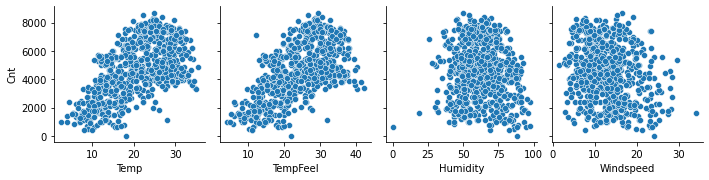

In [65]:
# Building a pairplot of target variable with numeric data

sns.pairplot(x_vars = ['Temp', 'TempFeel', 'Humidity', 'Windspeed'], y_vars = 'Cnt', data = bike_data)
plt.show()

__Observations:__

-  Temp & TempFeel are in linear relation with target variable
-  Though Humidity and Windspeed are not in linear relation, based on domain information, as they are important features, they are considered as part of the model
-  However Humidity was dropped due high collinearity 

### Mean of residuals

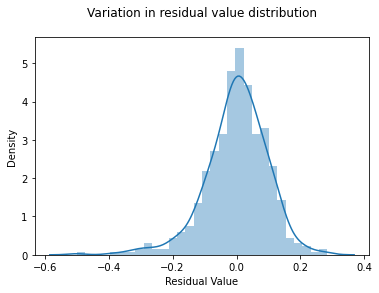

In [66]:
# Get the residual difference between y_train and y_pred

y_train_pred = lm.predict(X_train_rfe_sm)
res = y_train - y_train_pred

sns.distplot(res)
plt.xlabel('Residual Value')
plt.title('Variation in residual value distribution\n')
plt.show()

In [67]:
# Calculate mean of residuals

np.mean(res)

-9.673090215533104e-16

__Observations:__
-  The mean value is almost equal to zero
-  The residual plot is normal distributed with a mean centered to zero

### Assumption of Homoscedacity

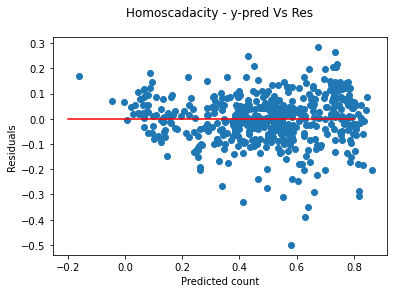

In [68]:
# plotting scatter plot between residuals and predicted train values
plt.scatter(y_train_pred, res)
plt.plot([0.8,-0.2], [0,0] , color='r')

plt.xlabel('Predicted count')
plt.ylabel('Residuals')

plt.title('Homoscadacity - y-pred Vs Res\n')
plt.show()

In [69]:
import statsmodels.stats as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
values = sms.diagnostic.het_goldfeldquandt(res, X_train_rfe)
lzip(name, values)

[('F statistic', 0.9928135632465568), ('p-value', 0.522483721697701)]

__Observations:__

-  There is no definite pattern (like linear or quadratic or funnel shaped) in the above scatter plot
-  This proves that the residuals have equal or almost equal variance across the regression line
-  Since p value is more than 0.05 in Goldfeld Quandt Test, we can say that error terms are homoscedastic

### Independent error terms

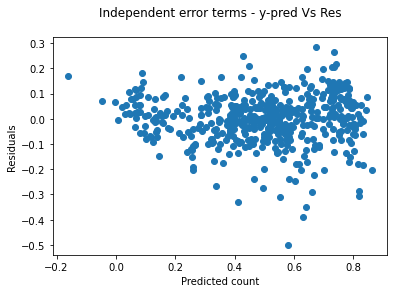

In [70]:
# plotting scatter plot between residuals and predicted train values
plt.scatter(y_train_pred, res)
plt.xlabel('Predicted count')
plt.ylabel('Residuals')

plt.title('Independent error terms - y-pred Vs Res\n')
plt.show()

__Observations:__
-  As the error terms does not follow any pattern, we can say that the error terms are independent of each other 

### No Multicolliniarity

In [71]:
# Get the VIF for the selected features

vif

,Features,VIF
1,TempFeel,4.93
2,Windspeed,4.91
4,Season_Winter,2.35
0,Year,2.08
7,Month_Nov,1.75
3,Season_Spring,1.69
9,WeatherSituation_Mist,1.56
6,Month_Jul,1.37
5,Month_Dec,1.31
8,WeatherSituation_LightSnow,1.10


__Observations:__

-  The VIF Values indicates the multicolliniarity is minimal (General consideration is VIF should be less than 5)

# Step 7: Calculating r-squared for test data

In [72]:
scale_vars = ['Temp', 'TempFeel', 'Humidity', 'Windspeed', 'Cnt']
df_test[scale_vars] = scale.transform(df_test[scale_vars])

df_test.head()

,Year,Holiday,Workingday,Temp,TempFeel,Humidity,Windspeed,Cnt,Season_Spring,Season_Summer,...,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,WeatherSituation_LightSnow,WeatherSituation_Mist,Week_Number_2,Week_Number_3,Week_Number_4,Week_Number_5
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,0,1,...,0,0,0,0,0,0,1,0,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,0,1,...,1,0,0,0,0,0,0,0,0,1
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,1,0,0,0,0,0,0,0,0,1
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,1,0,...,0,1,0,0,0,1,0,0,1,0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,0,1,...,0,1,0,0,0,0,0,0,0,1


In [73]:
y_test = df_test.pop('Cnt')
X_test = df_test

In [74]:
X_test_new = X_test[X_train_rfe.columns]

In [75]:
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lm.predict(X_test_new)

In [76]:
r2_score_train = r2_score(y_train, y_train_pred)
print('Final r-squared value for test dataset is:', round(r2_score_train,3))

r2_score_test = r2_score(y_test, y_test_pred)
print('Final r-squared value for test dataset is:', round(r2_score_test,3))

Final r-squared value for test dataset is: 0.827
Final r-squared value for test dataset is: 0.813


__Final conclusion:__

-  As the F-statistic is very very less, the model is significant 
-  The given r-squared value on training set indicates that 82.7% variability is explained by this model
-  Also, the adjusted r-squared is: 82.3%
- Final equation can be written as:

0.24 + Year*0.2428 + TempFeel*0.4551 + Windspeed*(-0.0886) + Season_Spring*(-0.1577) + Season_Winter*0.0835 + Month_Dec*(-0.0783) + Month_Jul*(-0.0662) + Month_Nov*(-0.0926) + WeatherSituation_LightSnow*(-0.2587) + WeatherSituation_Mist*(-0.0817)